In [1]:
ls

CSV_essay_bertlin_alg1.ipynb  new_predictions.npy
CSV_speech_bertlin_alg1.csv   old_predictions.npy
Smallest_k.ipynb              run_retrain.sh
Smallest_k.py                 run_tagger.sh
Use_approK.ipynb              save_feature.py
__pycache__/                  save_feature.sh
appro_ks_IP.npy               test_feature_save.npy
bert_util.py                  test_label_save.npy
essay_data/                   train_feature_save.npy
model_save_feature/           train_label_save.npy


In [1]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions.npy",  allow_pickle=True)
app_k = np.load("appro_ks_IP.npy", allow_pickle=True)
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
pred = np.load("old_predictions.npy", allow_pickle=True)
np.sum([new_pred_k[i] != None for i in range(new_pred_k.shape[0])])

571

In [2]:
np.mean([i for i in app_k if i != None])

465.5744308231173

In [3]:
new_pred_k

array([0.3344550771215689, None, None, ..., 0.4233797985574726,
       0.3158993654210376, 0.2430683809773746], dtype=object)

In [4]:
new_pred_k.shape[0]

1071

In [5]:
valid_new_pred_k = [new_pred_k[i] for i in range(new_pred_k.shape[0]) if new_pred_k[i] != None]

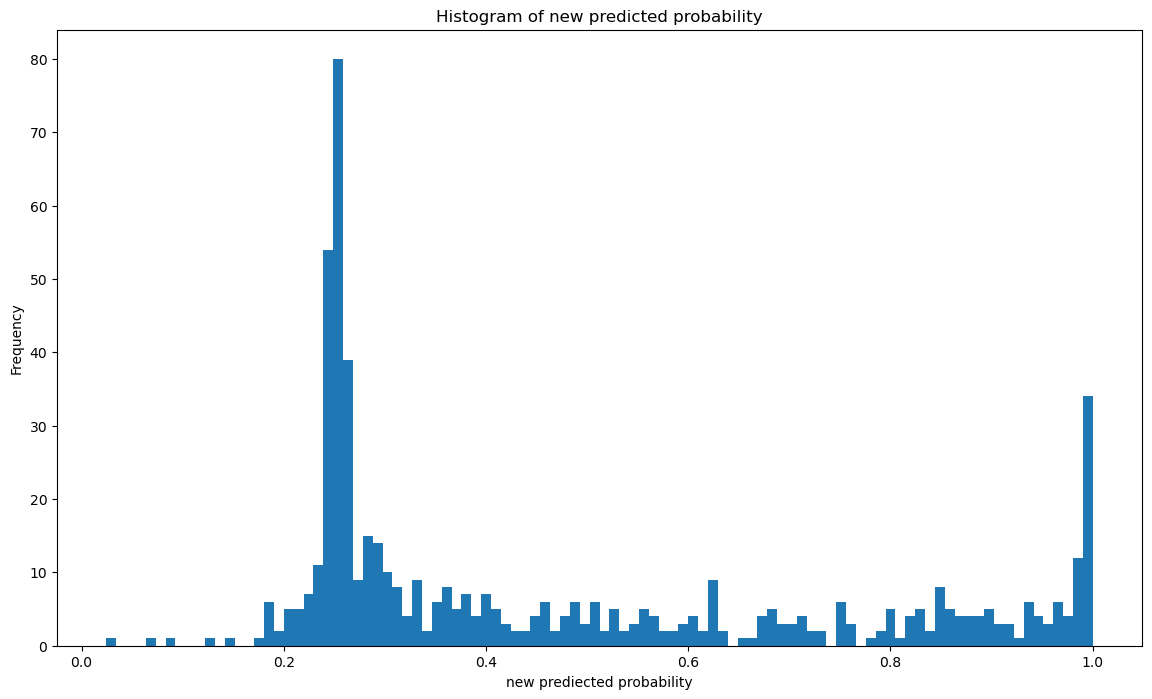

In [6]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(valid_new_pred_k, bins=100)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

# How many of them is None

In [7]:
np.sum([app_k[i] != None for i in range(new_pred_k.shape[0])])

571

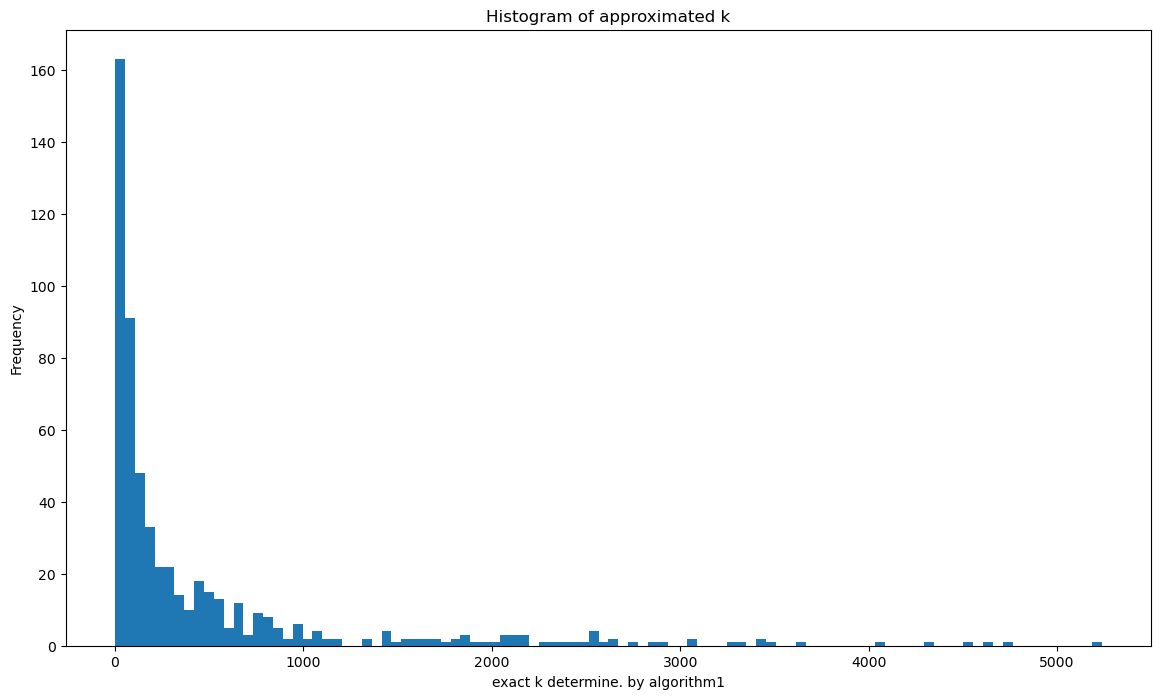

In [8]:
app_k_nonon=[app_k[i] for i in range(new_pred_k.shape[0]) if app_k[i] != None]

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=100)
plt.xlabel("exact k determine. by algorithm1")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k")
plt.show()

# For those are not None, how is the flip

In [9]:
flips = np.zeros((new_pred_k.shape[0], 1))
diff = np.zeros((new_pred_k.shape[0], 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(new_pred_k.shape[0]):
    if app_k[i] != None:
        if (pred[i].item() > 0.25) != (new_pred_k[i].item() > 0.25):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.25
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

old 0.12870460406529613
new 0.3344550771215689
appro k 64
flip label [1.]

old 0.07828957443109545
new 0.6208763195609376
appro k 301
flip label [1.]

old 0.07740187553710691
new 0.7034649915112576
appro k 421
flip label [1.]

old 0.10602224455769423
new 0.4375224629853922
appro k 257
flip label [1.]

old 0.20135127970411712
new 0.256420059396481
appro k 24
flip label [1.]

old 0.29092587846368706
new 0.24846927983158643
appro k 5
flip label [1.]

old 0.051877833478313734
new 0.988366685032119
appro k 2120
flip label [1.]

old 0.2209235878313831
new 0.24998729934042796
appro k 15
flip label [0.]

old 0.0927249172869682
new 0.5297713198341792
appro k 306
flip label [1.]

old 0.6172428366598401
new 0.17421527305431395
appro k 196
flip label [1.]

old 0.14434805923768557
new 0.300782349339207
appro k 93
flip label [1.]

old 0.04563952998892577
new 0.9975378731072949
appro k 2726
flip label [1.]

old 0.06744098660516802
new 0.7997461618564713
appro k 532
flip label [1.]

old 0.176349074768

In [10]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(new_pred_k.shape[0])])
num_flip

523

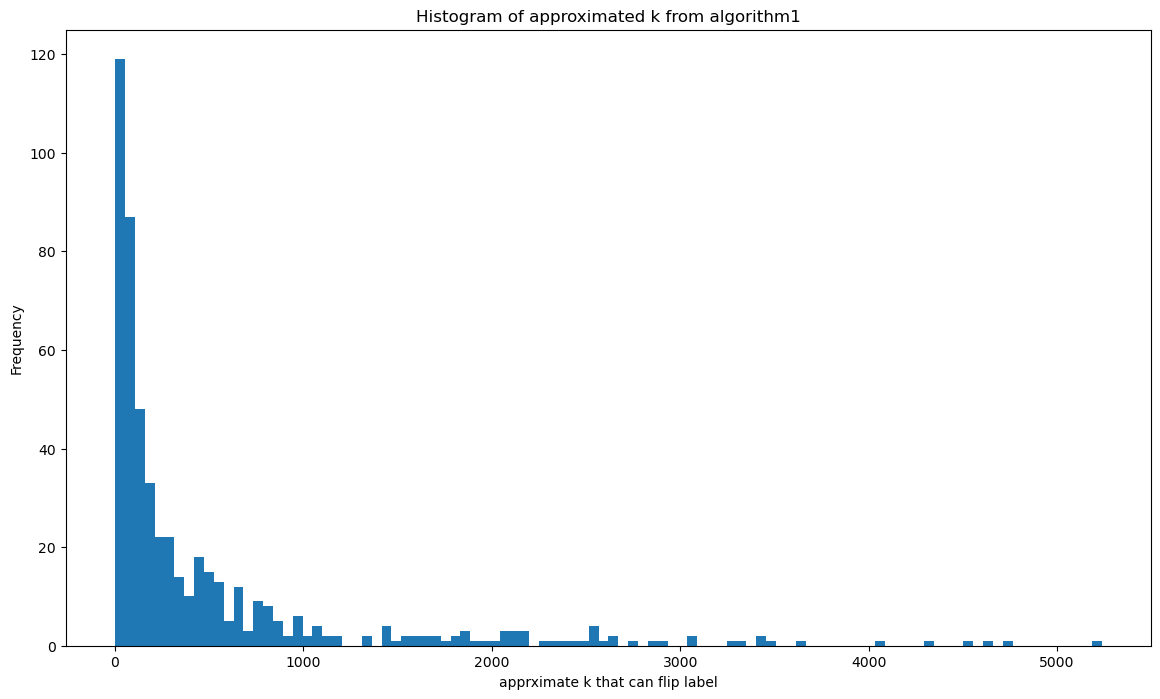

In [11]:

flip_idx = [i for i in range(new_pred_k.shape[0]) if flips[i] == 1 ]
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

In [12]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(new_pred_k.shape[0])])
num_noflip

48

In [13]:
num_nok = np.sum([flips[i] == 2 for i in range(new_pred_k.shape[0])])
num_nok

500

In [14]:
# diff for those flip the lable
diff1=[diff[i] for i in range(new_pred_k.shape[0]) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.25941500703581666, 0.0724452776689139)

In [15]:
# diff for those cannot flip the lable
diff0=[diff[i] for i in range(new_pred_k.shape[0]) if flips[i] == 0]
np.mean(np.abs(diff0)), np.var(np.abs(diff0))

(0.0034486297771970224, 9.873888385488907e-06)

In [16]:
index1 = [i for i in range(new_pred_k.shape[0]) if flips[i] == 1]

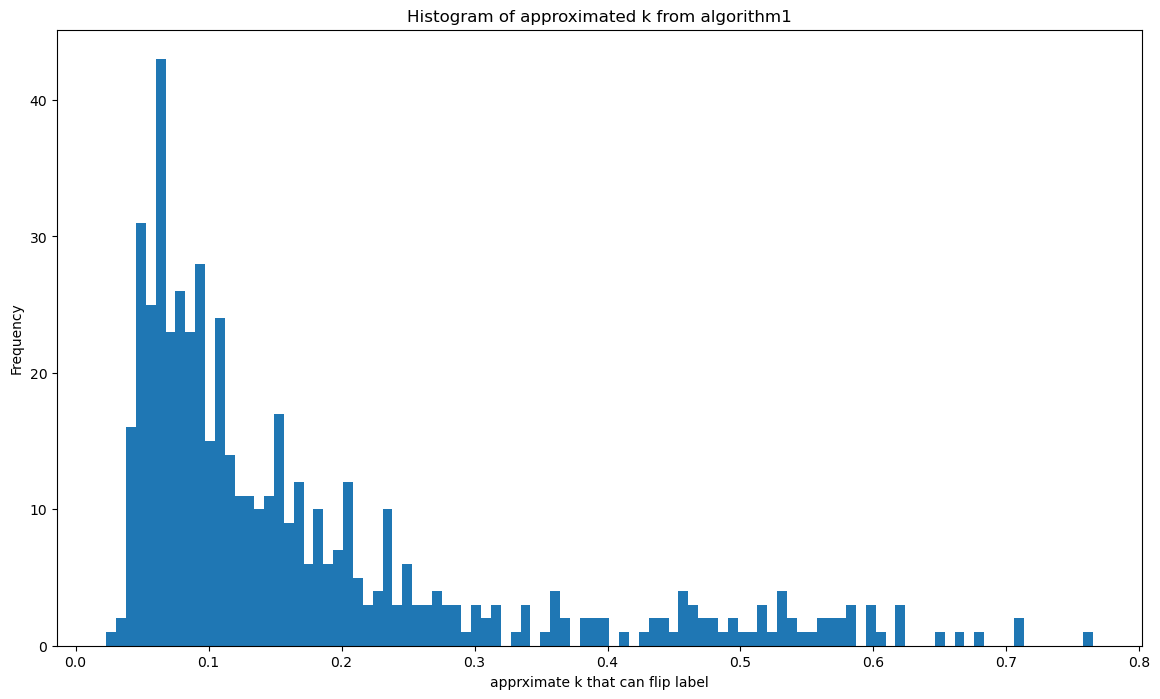

In [17]:

# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(pred[index1], bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

In [29]:
index10 = [i for i in range(new_pred_k.shape[0]) if flips[i] == 1 or 0]

In [30]:
np.array(index10)

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
        15,  16,  17,  18,  20,  22,  23,  24,  26,  27,  29,  30,  31,
        32,  33,  34,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  54,  55,  56,  57,  58,  60,
        61,  63,  64,  65,  67,  68,  69,  70,  71,  73,  74,  75,  76,
        77,  79,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  99, 100, 101, 103, 104, 105, 106, 107,
       108, 109, 111, 113, 114, 116, 118, 119, 120, 121, 124, 126, 128,
       130, 131, 132, 133, 134, 135, 136, 139, 140, 141, 143, 144, 145,
       146, 148, 149, 151, 153, 154, 157, 158, 160, 161, 163, 164, 165,
       166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193,
       194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

# not always underestimate?

# exact k is smaller

# order list

In [3]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF/Logistic_SST/IF_lr_fix'